# Impact of Vaccination on covid-19 mitigation

## Goal

The main goal of this project is to analyze the evolution of the vaccination campain in a determined country, and its respective influence on well-known parameters that characterize the status of the pandemic. A good underestanding of the main parameters will help us to assume responsable postures as citizens of the world.

## Motivation and Strategy

- As part of the battle agains covid-19 pandemic, free data are available in different web sources. However, the data are in raw state that must be processed and analyzed to obtain useful information. In addition, we can find open journals that provide information on recent research that covers different topics towards underestanding the pandemic and its mitigation. A the end of this project, I cite different scientific papers that inspired me to shape this work. See bibliography. 
- In this project I will use the web source 'Our World in Data', which provides the option to collect data for free through the Github platform. The data has been compiled from well-known sources such as the Jhon Hopkins Institute and is updated daily.
- The data contains different parameters related to location and pandemic indicators. This project focused on the analysis of the pandemic in a specific place.
- The first step will be the visualization of the indicators and the correlation  among them (Exploratory Analysis). 
- The second step will be to propose parameters that potentially play an important role in the evolution of the pandemic (Feature Engeneering).
- The third step will be the implementation of regression algortithms in the framework of supervised learning in order to corroborate and judge the importance of the selected parameters (Creation, implementation and evaluation of the model).
- This project is under construction and will be countinuosly evaluated, maintained and skaled.

## Evaluation methods

- Mean squared error
- Root squared error
- Coefficient of determination
- Scores of different prediction models

## Setup

In [36]:
# Script running on python version:
from platform import python_version 
print('current python version: ', python_version())

# Script using sklearn library verion:
import sklearn
print('current sklearn version: ',sklearn.__version__)

# Python version requirements
# This project was created on 3.8.5 version
import sys 
assert sys.version_info >= (3, 8)

# This project was created with Scikit-Learn 0.24.2
assert sklearn.__version__ >= '0.24'

# Common libraries
import numpy as np
import pandas as pd
import os 

# Setting up plots
%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.colors
matplotlib.style.use('ggplot')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Function for saving figures
PROJECT_ROOT_DIR = 'C:\Data_Science_Projects\COVID19'
CHAPTER_ID = 'end_to_end_project_covid19'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_figure(figure_id, tight_layout=True, figure_extention= 'png', resolution=300):
    path = os.path.join(IMAGES_PATH, figure_id + '.' + figure_extention)
    print('Saving figure', figure_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=figure_extention, dpi=resolution)

current python version:  3.8.5
current sklearn version:  0.24.2


## Data acquisition

In [37]:
# reading Covid19 data for several countries in the world
# source: https://ourworldindata.org/covid-vaccinations

URL = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
def load_covid19_data(url=URL):
    return pd.read_csv(url)

df = load_covid19_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109518 entries, 0 to 109517
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               109518 non-null  object 
 1   continent                              104453 non-null  object 
 2   location                               109518 non-null  object 
 3   date                                   109518 non-null  object 
 4   total_cases                            104825 non-null  float64
 5   new_cases                              104822 non-null  float64
 6   new_cases_smoothed                     103812 non-null  float64
 7   total_deaths                           94384 non-null   float64
 8   new_deaths                             94539 non-null   float64
 9   new_deaths_smoothed                    103812 non-null  float64
 10  total_cases_per_million                104270 non-null  

## Data exploration

In [38]:
# Data of continents
df['continent'].value_counts()

Africa           28005
Europe           25853
Asia             25713
North America    13769
South America     6512
Oceania           4601
Name: continent, dtype: int64

In [39]:
# Countries of Europe and number of entries
df[df.continent=='Europe']['location'].value_counts()

Germany                   569
France                    569
Finland                   564
Russia                    562
United Kingdom            562
Italy                     562
Spain                     561
Sweden                    561
Slovenia                  560
Denmark                   560
Estonia                   559
Belgium                   558
Malta                     556
Greece                    543
Portugal                  543
Latvia                    540
Luxembourg                540
Switzerland               537
Albania                   537
Croatia                   537
Poland                    537
Austria                   537
Norway                    537
Serbia                    536
Iceland                   536
North Macedonia           536
Romania                   536
Netherlands               535
San Marino                535
Belarus                   534
Lithuania                 533
Ireland                   533
Slovakia                  533
Monaco    

## Analysis of a specific Country

In [40]:
# Choose the country. Some countries do not have complete data!
country = 'United Kingdom'
df_country = df[df.location == country]

### Visualization: Cases and Deaths

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

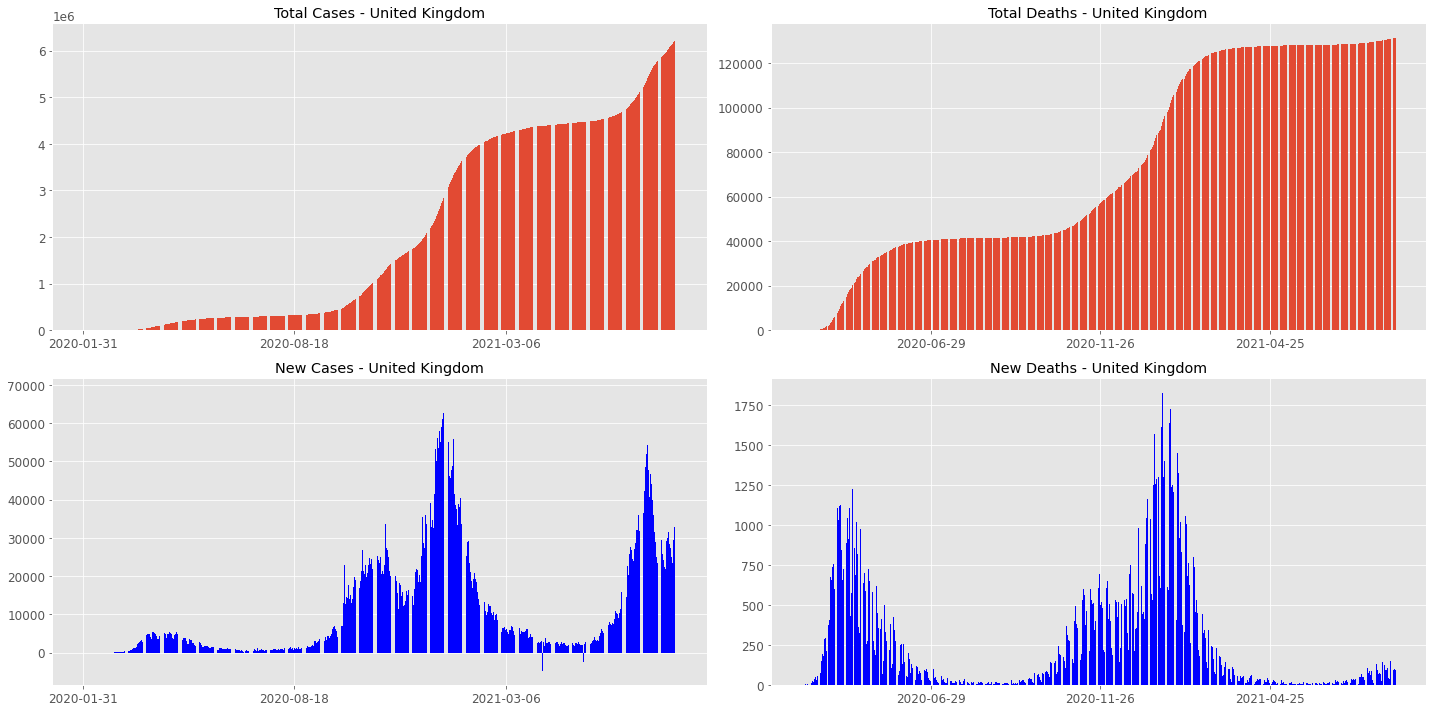

In [41]:
fig_1 = plt.figure(1, figsize=(20,10))
ax = fig_1.subplots(nrows=2, ncols=2)

ax[0][0].set_title('Total Cases' + ' - ' + country)
ax[0][0].bar(df_country.date, df_country.total_cases)
ax[0][0].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[0][1].set_title('Total Deaths' + ' - ' + country)
ax[0][1].bar(df_country.date, df_country.total_deaths)
ax[0][1].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[1][0].set_title('New Cases' + ' - ' + country)
ax[1][0].bar(df_country.date, df_country.new_cases, color='blue')
ax[1][0].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[1][1].set_title('New Deaths' + ' - ' + country)
ax[1][1].bar(df_country.date, df_country.new_deaths, color='blue')
ax[1][1].xaxis.set_major_locator(plt.MaxNLocator(4))
plt.tight_layout()

A simple way to analyze the evolution of the "total" features (in red), is to consider them functions of time. The corresponding mathematical derivatives are the "new" features (in blue) as we can see in the last figure. In other words, the peaks of the "new" features produce the high slope in the "total" feature functions. 

### Patients: Intensive Care Unit (ICU) & Hospitalization (Hosp.) 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


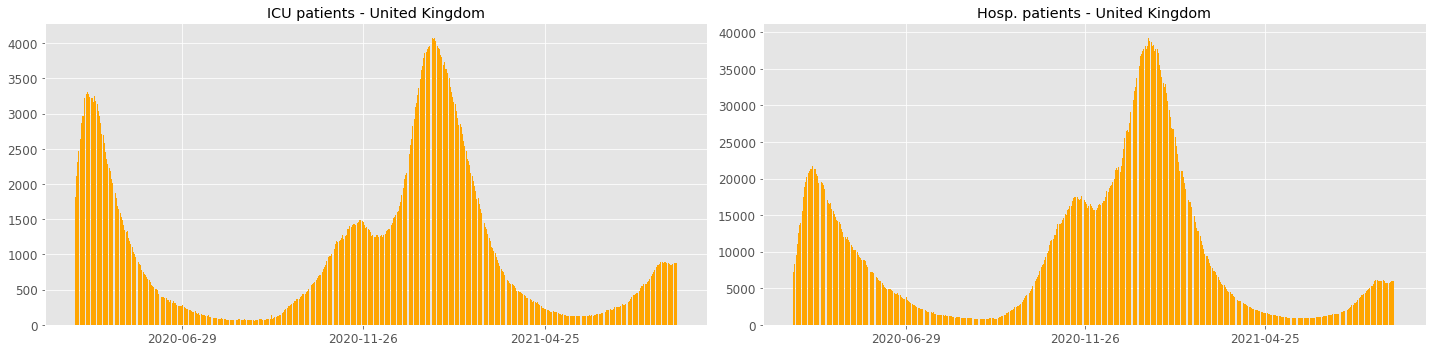

In [42]:
fig_2 = plt.figure(2, figsize=(20,5))
ax = fig_2.subplots(nrows=1, ncols=2)

ax[0].set_title('ICU patients' + ' - ' + country)
ax[0].bar(df_country.date, df_country.icu_patients, color='orange')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[1].set_title('Hosp. patients' + ' - ' + country)
ax[1].bar(df_country.date, df_country.hosp_patients, color='orange')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(4))
plt.tight_layout()

The number of patients in the hospital and / or intensive care unit is an important indicator of the evolution of the pandemic. It will give us an idea of the power of the coronavirus in the development of serious health complications.

### Vaccination

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

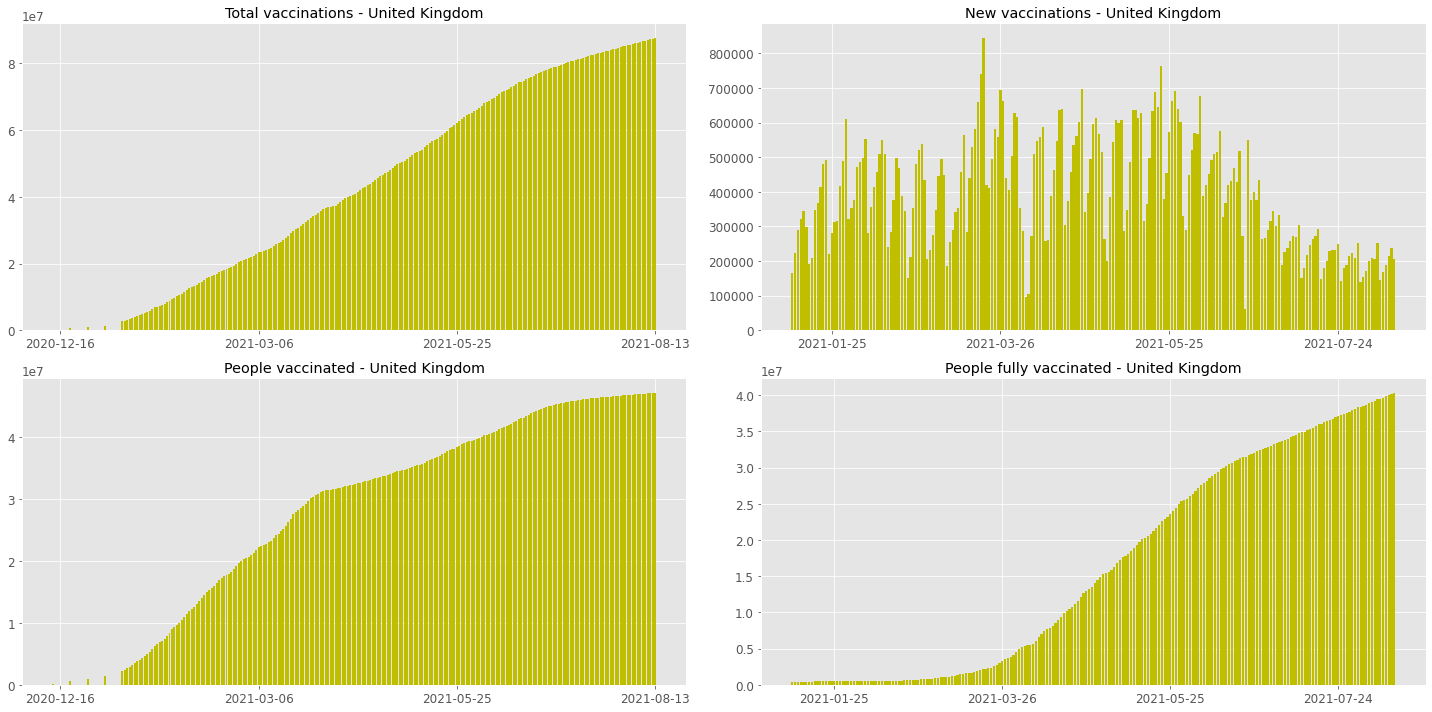

In [43]:
fig_3 = plt.figure(3, figsize=(20,10))
ax = fig_3.subplots(nrows=2, ncols=2)

ax[0][0].set_title('Total vaccinations' + ' - ' + country)
ax[0][0].bar(df_country.date, df_country.total_vaccinations, color='y')
ax[0][0].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[0][1].set_title('New vaccinations' + ' - ' + country)
ax[0][1].bar(df_country.date, df_country.new_vaccinations, color='y')
ax[0][1].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[1][0].set_title('People vaccinated' + ' - ' + country)
ax[1][0].bar(df_country.date, df_country.people_vaccinated, color='y')
ax[1][0].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[1][1].set_title('People fully vaccinated' + ' - ' + country)
ax[1][1].bar(df_country.date, df_country.people_fully_vaccinated, color='y')
ax[1][1].xaxis.set_major_locator(plt.MaxNLocator(4))
plt.tight_layout()

We observe in this figure raw numbers corresponding to the vaccination campaign of the current country under scrutiny. In the next figure, we will see vaccination in terms of percentage of country population.


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


The population of United Kingdom is 67886004.0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


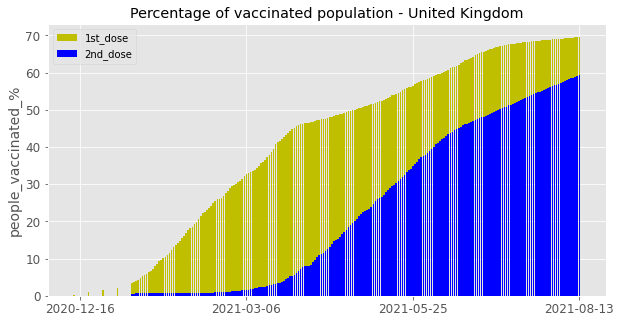

In [44]:
# Calculating percentage (%) and adding new columns to df_country data frame
population_country = df_country.population.iloc[-1]
print(f'The population of {country} is {population_country}')
df_country['people_vaccinated_%'] = df_country.people_vaccinated/population_country
df_country['people_fully_vaccinated_%'] = df_country.people_fully_vaccinated/population_country

fig_4 = plt.figure(4, figsize=(10,5))
ax = fig_4.subplots()

ax.set_title('Percentage of vaccinated population' + ' - ' + country)
ax.bar(df_country.date, df_country.people_vaccinated_per_hundred, color='y', label='1st_dose')
ax.bar(df_country.date, df_country.people_fully_vaccinated_per_hundred, color='b', label='2nd_dose')
ax.legend(loc="upper left")
ax.set_ylabel('people_vaccinated_%')
ax.xaxis.set_major_locator(plt.MaxNLocator(4))


### Rates: Reproduction & Positive

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


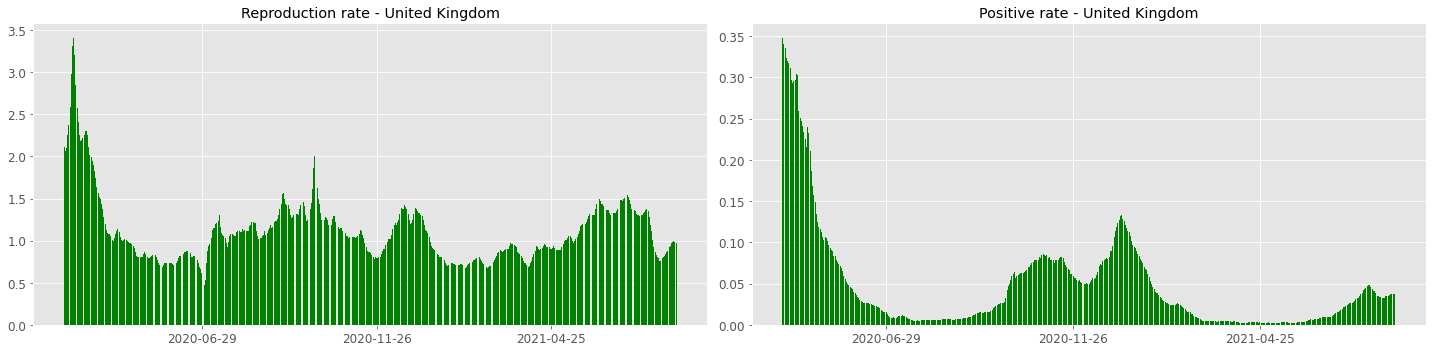

In [45]:
fig_5 = plt.figure(5, figsize=(20,5))
ax = fig_5.subplots(nrows=1, ncols=2)

ax[0].set_title('Reproduction rate' + ' - ' + country)
ax[0].bar(df_country.date, df_country.reproduction_rate, color='green')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[1].set_title('Positive rate' + ' - ' + country)
ax[1].bar(df_country.date, df_country.positive_rate, color='green')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(4))
plt.tight_layout()

- The R number is a way of rating coronavirus's ability to spread. R is the number of people that one infected person will pass on a virus to, on average.
Coronavirus - known officially as Sars-CoV-2 - would have a reproduction number of about three if no action was taken to stop it spreading. If the R value is higher than one, then the number of cases keeps increasing. But if the R number is lower the disease will eventually stop spreading, because not enough new people are being infected to sustain the outbreak. See https://www.bbc.com/news/health-52473523.

- The Reproduction_rate is taken from Arroyo Marioli et al. (2020). https://doi.org/10.2139/ssrn.3581633,Real-time estimate of the effective reproduction rate (R) of COVID-19. See https://github.com/crondonm/TrackingR/tree/main/Estimates-Database.

- Positive_rate, National government reports, "The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)".

### Stringency index and Excess mortality

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


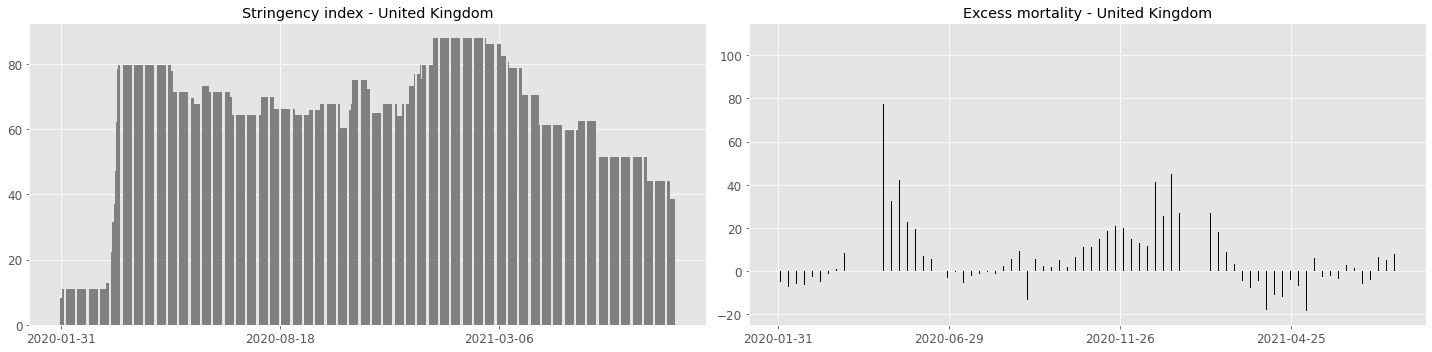

In [46]:
fig_6 = plt.figure(6, figsize=(20,5))
ax = fig_6.subplots(nrows=1, ncols=2)

ax[0].set_title('Stringency index' + ' - ' + country)
ax[0].bar(df_country.date, df_country.stringency_index, color='grey')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[1].set_title('Excess mortality' + ' - ' + country)
ax[1].bar(df_country.date, df_country.excess_mortality, color='black')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(4))
plt.tight_layout()

- Stringency_index is a way of measuring the goverment response. This composite
measure is based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100, where 100 is the strictest response.

- Excess mortality P-scores for all ages. "The P-score is the percentage difference between the number of weekly or monthly deaths in 2020–2021 and the average number of deaths in the same period over the years 2015–2019". see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality for the definition of the P-scores and how they are calculated.

### Constants

In [47]:
df_cons = df_country.loc[:,['date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
                      'extreme_poverty', 'human_development_index', 'life_expectancy', 'cardiovasc_death_rate', 'diabetes_prevalence',
                      'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand']]
df_cons

,date,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,human_development_index,life_expectancy,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
103222,2020-01-31,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,0.932,81.32,122.137,4.28,20.0,24.7,NaN,2.54
103223,2020-02-01,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,0.932,81.32,122.137,4.28,20.0,24.7,NaN,2.54
103224,2020-02-02,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,0.932,81.32,122.137,4.28,20.0,24.7,NaN,2.54
103225,2020-02-03,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,0.932,81.32,122.137,4.28,20.0,24.7,NaN,2.54
103226,2020-02-04,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,0.932,81.32,122.137,4.28,20.0,24.7,NaN,2.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103779,2021-08-10,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,0.932,81.32,122.137,4.28,20.0,24.7,NaN,2.54
103780,2021-08-11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,0.932,81.32,122.137,4.28,20.0,24.7,NaN,2.54
103781,2021-08-12,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,0.932,81.32,122.137,4.28,20.0,24.7,NaN,2.54
103782,2021-08-13,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,0.932,81.32,122.137,4.28,20.0,24.7,NaN,2.54


The last table shows constants that might be interesting to consider for comparison analysis between countries. However, in this project, the focus is in a specfic population.

### Analysis of features correlation

<AxesSubplot:>

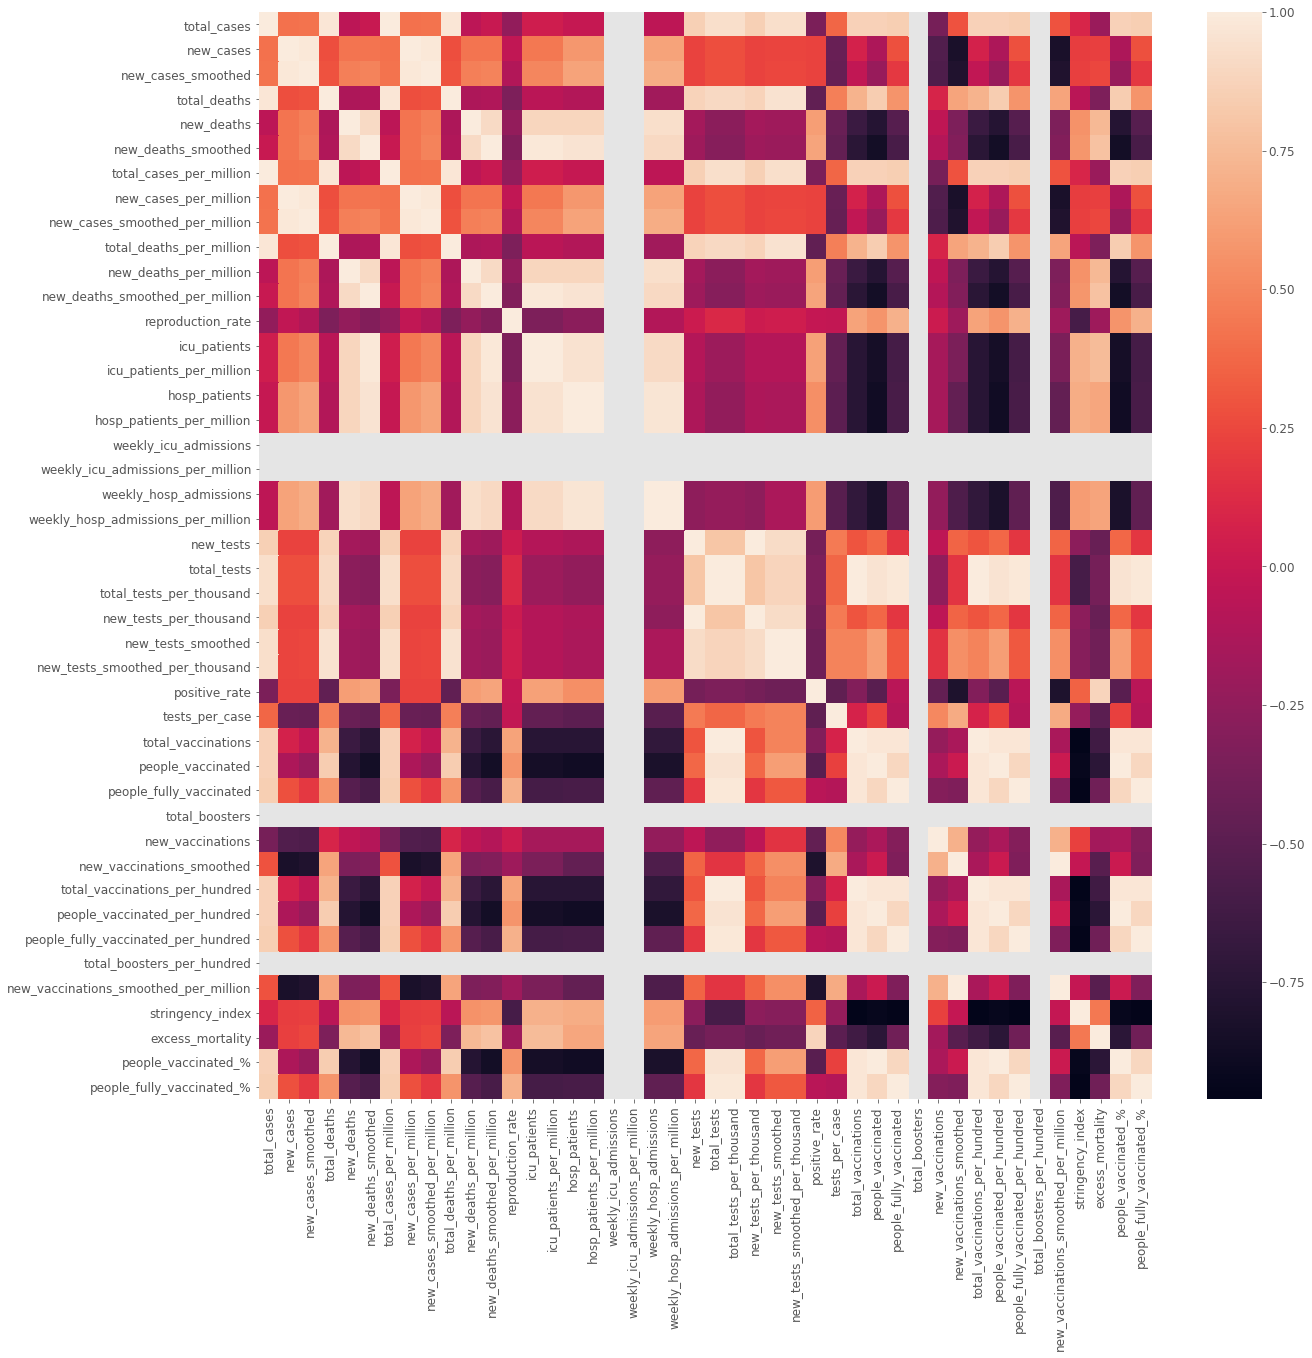

In [48]:
# drop constant parameters
df_corr = df_country.drop(columns=['date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
                      'extreme_poverty', 'human_development_index', 'life_expectancy', 'cardiovasc_death_rate', 'diabetes_prevalence',
                      'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'])

correlation = df_corr.corr()

import seaborn as sns
fig_7 = plt.figure(7, figsize=(20,20))
sns.heatmap(correlation, annot=False)

The last matrix is a large view of the correlation of different parameters of the database. I will focus now in the correlation of the "vaccination" feature with other features that are considered important as pandemic indicators. See Bibliography.

#### Vaccination correlation

<AxesSubplot:>

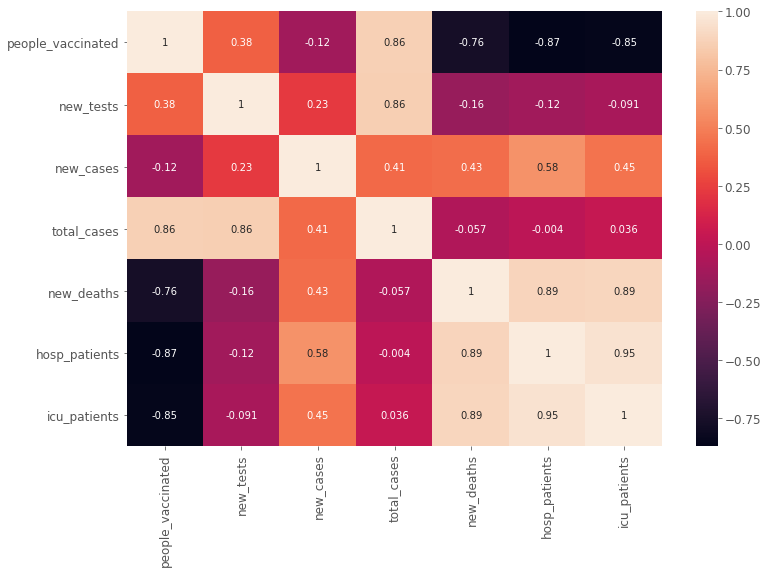

In [49]:
# Correlation of vaccination on main features of the pandemic
variables_set_1 =['people_vaccinated', 'new_tests' ,'new_cases', 'total_cases', 'new_deaths', 'hosp_patients', 'icu_patients']
correlation_2 = df_country[variables_set_1].corr()
fig_8 = plt.figure(8, figsize=(12,8))
sns.heatmap(correlation_2, annot=True)

The interpretation of the correlation matrix will, of course, depend on the selected country. However, I analyze the present case of the United Kingdom to date. The People_vaccinated feature has a positive correlation with total_cases (0.86) and a low correlation with features such as new_tests and new_cases (0.38 and -0.13). The interesting result is the negative correlation with new_deaths, hosp_patients and icu_patients (-0.76, -0.87 and -0.86). With these data, it can be speculated that although there is no clear evidence of the impact of vaccination on mitigating infections, there is a good sign of vaccination to avoid the development of serious health complications in infected people. 

<AxesSubplot:>

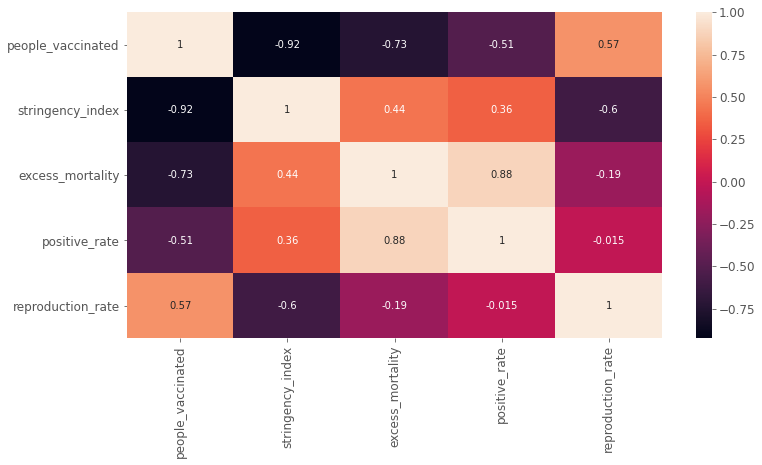

In [50]:
variables_set_2 =['people_vaccinated', 'stringency_index' ,'excess_mortality', 'positive_rate', 'reproduction_rate']
correlation_3 = df_country[variables_set_2].corr()
fig_9 = plt.figure(9, figsize=(12,6))
sns.heatmap(correlation_3, annot=True)

In the last correlation matrix, people_vaccinated variable is compared with indices and rates. Here we observe the negative correlation with the stringency index that indicates the relaxation of restrictive measures taken by the govermemnt while the vaccination campaing advances. Similar behavior is shown for the exess_mortatilty variable. The correlation with the reproduction_rate is in agreement with the interpretation of the influence of vaccination on the number of infections described above.

#### Visualization of vaccination and main pandemic indicators

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

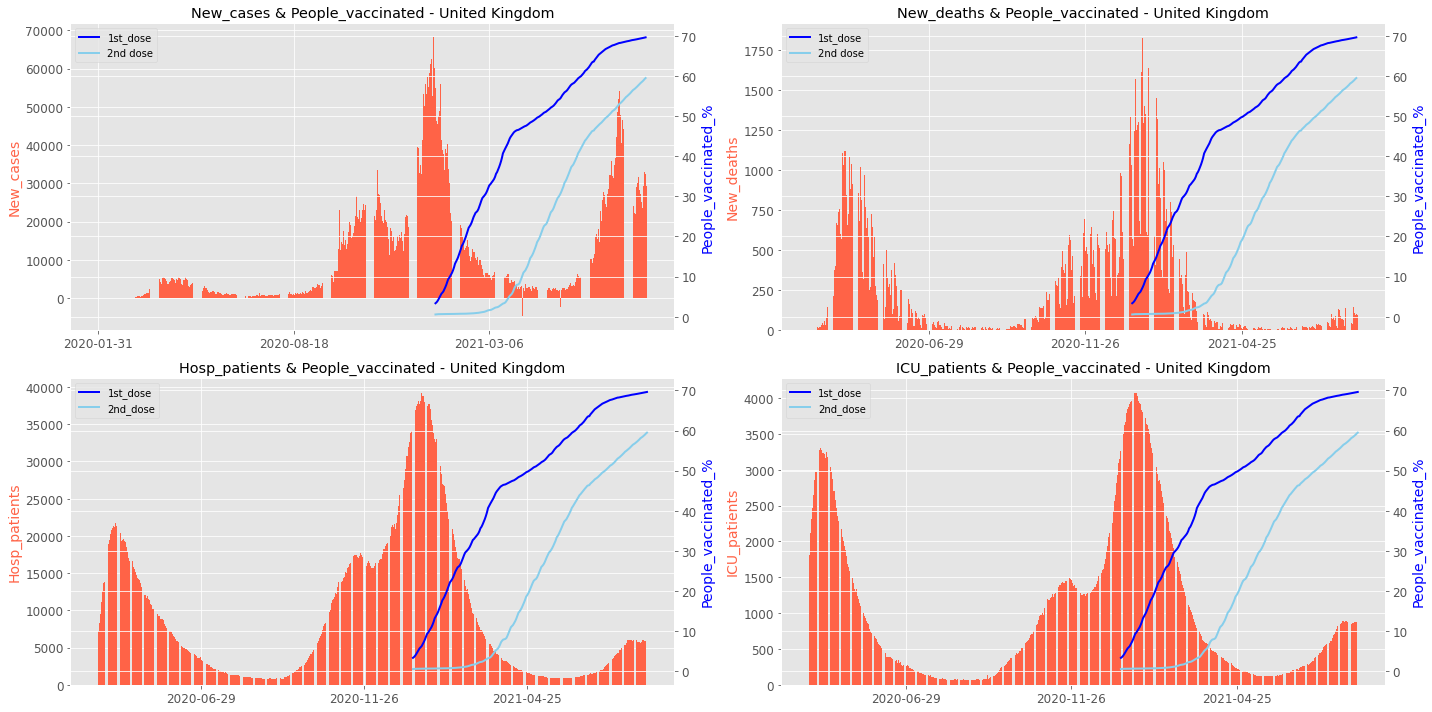

In [51]:
# Graphics: People vaccinated vs (new_cases, new_deaths, hops_patients, icu_patients)
fig_10 = plt.figure(10, figsize=(20,10))
ax = fig_10.subplots(nrows=2, ncols=2)

ax[0][0].set_title('New_cases & People_vaccinated' + ' - ' + country)
ax[0][0].bar(df_country.date, df_country.new_cases, color='tomato')
ax[0][0].set_ylabel('New_cases', color='tomato')
ax0 = ax[0][0].twinx()
ax0.plot(df_country.date, df_country.people_vaccinated_per_hundred, color='blue', lw=2, label='1st_dose')
ax0.plot(df_country.date, df_country.people_fully_vaccinated_per_hundred, color='skyblue', lw=2, label='2nd dose')
ax0.legend(loc ="upper left")
ax0.set_ylabel('People_vaccinated_%', color='blue')
ax[0][0].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[0][1].set_title('New_deaths & People_vaccinated' + ' - ' + country)
ax[0][1].bar(df_country.date, df_country.new_deaths, color='tomato')
ax[0][1].set_ylabel('New_deaths', color='tomato')
ax1 = ax[0][1].twinx()
ax1.plot(df_country.date, df_country.people_vaccinated_per_hundred, color='blue', lw=2, label='1st_dose')
ax1.plot(df_country.date, df_country.people_fully_vaccinated_per_hundred, color='skyblue', lw=2, label='2nd dose')
ax1.legend(loc="upper left")
ax1.set_ylabel('People_vaccinated_%', color='blue')
ax[0][1].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[1][0].set_title('Hosp_patients & People_vaccinated' + ' - ' + country)
ax[1][0].bar(df_country.date, df_country.hosp_patients, color='tomato')
ax[1][0].set_ylabel('Hosp_patients', color='tomato')
ax2 = ax[1][0].twinx()
ax2.plot(df_country.date, df_country.people_vaccinated_per_hundred, color='blue', lw=2, label='1st_dose')
ax2.plot(df_country.date, df_country.people_fully_vaccinated_per_hundred, color='skyblue', lw=2, label='2nd_dose')
ax2.legend(loc="upper left")
ax2.set_ylabel('People_vaccinated_%', color='blue')
ax[1][0].xaxis.set_major_locator(plt.MaxNLocator(4))

ax[1][1].set_title('ICU_patients & People_vaccinated' + ' - ' + country)
ax[1][1].bar(df_country.date, df_country.icu_patients, color='tomato')
ax[1][1].set_ylabel('ICU_patients', color='tomato')
ax3 = ax[1][1].twinx()
ax3.plot(df_country.date, df_country.people_vaccinated_per_hundred, color='blue', lw=2, label='1st_dose')
ax3.plot(df_country.date, df_country.people_fully_vaccinated_per_hundred, color='skyblue', lw=2, label='2nd_dose')
ax3.legend(loc="upper left")
ax3.set_ylabel('People_vaccinated_%', color='blue')
ax[1][1].xaxis.set_major_locator(plt.MaxNLocator(4))

plt.tight_layout()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

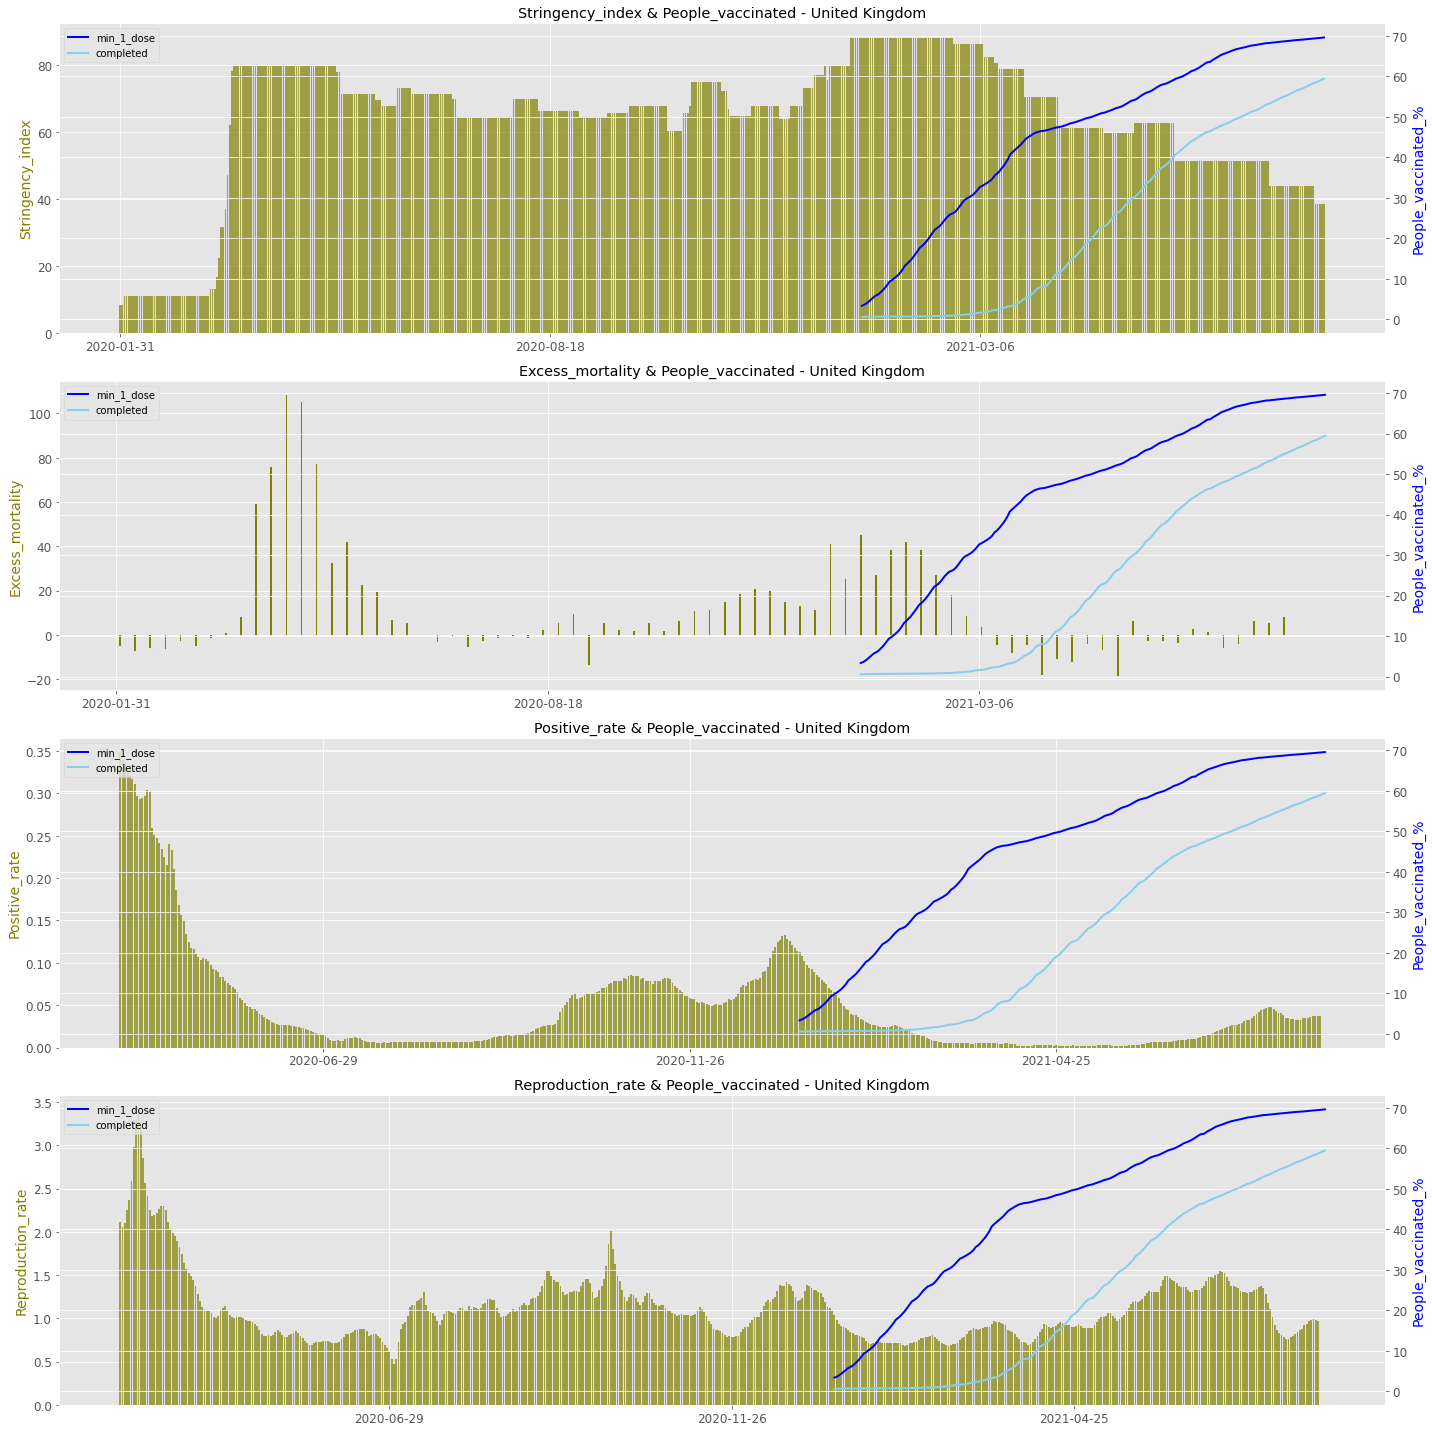

In [52]:
# Graphics: people vaccinated vs (stringency index, excess_mortality, positive_rate)
fig_11 = plt.figure(11, figsize=(20,20))
ax = fig_11.subplots(nrows=4, ncols=1)

ax[0].set_title('Stringency_index & People_vaccinated' + ' - ' + country)
ax[0].bar(df_country.date, df_country.stringency_index, color='olive', alpha=0.7)
ax[0].set_ylabel('Stringency_index', color='olive')
ax0 = ax[0].twinx()
ax0.plot(df_country.date, df_country.people_vaccinated_per_hundred, color='blue', lw=2, label='min_1_dose')
ax0.plot(df_country.date, df_country.people_fully_vaccinated_per_hundred, color='skyblue', lw=2, label='completed')
ax0.legend(loc='upper left')
ax0.set_ylabel('People_vaccinated_%', color='blue')
ax0.xaxis.set_major_locator(plt.MaxNLocator(4))

ax[1].set_title('Excess_mortality & People_vaccinated' + ' - ' + country)
ax[1].bar(df_country.date, df_country.excess_mortality, color='olive')
ax[1].set_ylabel('Excess_mortality', color='olive')
ax1 = ax[1].twinx()
ax1.plot(df_country.date, df_country.people_vaccinated_per_hundred, color='blue', lw=2, label='min_1_dose')
ax1.plot(df_country.date, df_country.people_fully_vaccinated_per_hundred, color='skyblue', lw=2, label='completed')
ax1.legend(loc='upper left')
ax1.set_ylabel('People_vaccinated_%', color='blue')
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))

ax[2].set_title('Positive_rate & People_vaccinated' + ' - ' + country)
ax[2].bar(df_country.date, df_country.positive_rate, color='olive', alpha=0.7)
ax[2].set_ylabel('Positive_rate', color='olive')
ax2 = ax[2].twinx()
ax2.plot(df_country.date, df_country.people_vaccinated_per_hundred, color='blue', lw=2, label='min_1_dose')
ax2.plot(df_country.date, df_country.people_fully_vaccinated_per_hundred, color='skyblue', lw=2, label='completed')
ax2.legend(loc='upper left')
ax2.set_ylabel('People_vaccinated_%', color='blue')
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))

ax[3].set_title('Reproduction_rate & People_vaccinated' + ' - ' + country)
ax[3].bar(df_country.date, df_country.reproduction_rate, color='olive', alpha=0.7)
ax[3].set_ylabel('Reproduction_rate', color='olive')
ax3 = ax[3].twinx()
ax3.plot(df_country.date, df_country.people_vaccinated_per_hundred, color='blue', lw=2, label='min_1_dose')
ax3.plot(df_country.date, df_country.people_fully_vaccinated_per_hundred, color='skyblue', lw=2, label='completed')
ax3.legend(loc='upper left')
ax3.set_ylabel('People_vaccinated_%', color='blue')
ax3.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.tight_layout()

Modeling a pandemic can take many paths. In this regard, one can find in literature approaches from analytical models based on deep domain knowledge in epidemics to numerical methods of advance data mining and machine learning algorithms, as shown in some citations in the bibliography. The idea with this work is to try to measure the impact of vaccination on important pandemic indicators, which is something that has already shone with the correlation analysis of variables. However, a step forward would be to use some of the mentioned variables to predict indicators such as total_cases or new_cases. 

Based on the literature (see Bibliography), I will introduce an important feature which is the number of days since the covid19 outbreaks and I will make the first explorations of ML algorithms considering this variable as the only independent variable.  

## Preparing dataset for Machine Learning

In [53]:
# Chossing possible main features of the pandemic
# Targets : total_cases, new_cases
# Independent variables: sgtringency_index, total_vaccinations, people_vaccinated, people_fully_vaccinated, icu_patients, hosp_patients  
variables = ['date', 'new_cases', 'total_cases', 'new_deaths', 'icu_patients', 'hosp_patients',
            'stringency_index', 'people_vaccinated', 'people_fully_vaccinated']

# Dataframe for ML
df_ml = df_country[variables]

# New column: Number of days from Outbreak
df_ml.reset_index(level=0, inplace=True)
df_ml.loc[:, 'days_outbreak'] = df_ml.index

# Filling empty entries
df_ml.fillna(0, inplace=True)
df_ml



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,date,new_cases,total_cases,new_deaths,icu_patients,hosp_patients,stringency_index,people_vaccinated,people_fully_vaccinated,days_outbreak
0,103222,2020-01-31,2.0,2.0,0.0,0.0,0.0,8.33,0.0,0.0,0
1,103223,2020-02-01,0.0,2.0,0.0,0.0,0.0,8.33,0.0,0.0,1
2,103224,2020-02-02,0.0,2.0,0.0,0.0,0.0,11.11,0.0,0.0,2
3,103225,2020-02-03,6.0,8.0,0.0,0.0,0.0,11.11,0.0,0.0,3
4,103226,2020-02-04,0.0,8.0,0.0,0.0,0.0,11.11,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
557,103779,2021-08-10,23469.0,6146642.0,146.0,874.0,5964.0,38.43,47129400.0,39839709.0,557
558,103780,2021-08-11,29381.0,6176023.0,108.0,871.0,5944.0,38.43,47170968.0,40013470.0,558
559,103781,2021-08-12,32885.0,6208908.0,95.0,882.0,5875.0,38.43,47215352.0,40206029.0,559
560,103782,2021-08-13,32539.0,6241447.0,100.0,0.0,0.0,38.43,47254399.0,40372981.0,560


## Lineal Regression (LR)

### total cases = m(days_outbreak) + b

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
import math

y = df_ml.total_cases
X = df_ml[['days_outbreak']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Model training
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
total_cases_pred_LR = lin_reg.predict(X_test)

# Splitting dataset
print('X_train.shape:',X_train.shape)
print('X_test.shape:',X_test.shape)
print('y_train.shape:',y_train.shape)
print('y_test.shape:',y_test.shape,'\n')

# Coefficients & Intercept
print('Coefficient:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_, '\n')

# Error calculation:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, total_cases_pred_LR))
print('Root Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test, total_cases_pred_LR)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, total_cases_pred_LR))
print('Score: %.2f' % lin_reg.score(X_test, y_test))

X_train.shape: (449, 1)
X_test.shape: (113, 1)
y_train.shape: (449,)
y_test.shape: (113,) 

Coefficient: [11911.94890526]
Intercept: -1253566.1456054254 

Mean squared error: 442800697333.24
Root Mean squared error: 665432.71
Coefficient of determination: 0.90
Score: 0.90


### LR for the last month

In [55]:
y_lm = df_ml.total_cases.iloc[-30:]
X_lm = df_ml[['days_outbreak']].iloc[-30:]

from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X_lm, y_lm, test_size=0.20, random_state=42)

# Model training
from sklearn.linear_model import LinearRegression
lin_reg_lm = LinearRegression()
lin_reg_lm.fit(X_train_lm, y_train_lm)
total_cases_pred_LR_lm = lin_reg_lm.predict(X_test_lm)

# Splitting dataset
print('X_train.shape:',X_train_lm.shape)
print('X_test.shape:',X_test_lm.shape)
print('y_train.shape:',y_train_lm.shape)
print('y_test.shape:',y_test_lm.shape,'\n')

# Coefficients & Intercept
print('Coefficient:', lin_reg_lm.coef_)
print('Intercept:', lin_reg_lm.intercept_, '\n')

# Error calculation:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_lm, total_cases_pred_LR_lm))
print('Root Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test_lm, total_cases_pred_LR_lm)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test_lm, total_cases_pred_LR_lm))
print('Score: %.2f' % lin_reg_lm.score(X_test_lm, y_test_lm))

X_train.shape: (24, 1)
X_test.shape: (6, 1)
y_train.shape: (24,)
y_test.shape: (6,) 

Coefficient: [29783.34126163]
Intercept: -10426005.745518789 

Mean squared error: 552746009.50
Root Mean squared error: 23510.55
Coefficient of determination: 0.98
Score: 0.98


## Polynomial Regression (PR)

### total cases = to + t1X + t2X2 + ..... + tnXn

In [56]:
# Model training
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
degree = 2
polyreg_scaled = make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(X_train,y_train)
total_cases_pred_PR = polyreg_scaled.predict(X_test)

# Error calculation:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, total_cases_pred_PR))
print('Root Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test, total_cases_pred_PR)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, total_cases_pred_PR))
print('Score: %.2f' % polyreg_scaled.score(X_test, y_test))

Mean squared error: 242770978818.60
Root Mean squared error: 492717.95
Coefficient of determination: 0.94
Score: 0.94


### PR for the last month

In [57]:
# Model training last month
scaler = preprocessing.StandardScaler()
degree = 2
polyreg_scaled_lm = make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled_lm.fit(X_train_lm,y_train_lm)
total_cases_pred_PR_lm = polyreg_scaled_lm.predict(X_test_lm)

# Error calculation:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_lm, total_cases_pred_PR_lm))
print('Root Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test_lm, total_cases_pred_PR_lm)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test_lm, total_cases_pred_PR_lm))
print('Score: %.2f' % polyreg_scaled_lm.score(X_test_lm, y_test_lm))

Mean squared error: 254334190.15
Root Mean squared error: 15947.86
Coefficient of determination: 0.99
Score: 0.99


## Support Vector Machine-Regression (SVR)

In [58]:
from sklearn.svm import SVR

# Model training 
svm_reg = SVR(kernel='linear', degree=3.0, C=1.0, epsilon=0.1, gamma='auto', 
              shrinking=True, cache_size=200, max_iter=-1, coef0=0.0, tol=0.001, verbose=False)
svm_reg.fit(X_train, y_train)
total_cases_pred_svr = svm_reg.predict(X_test)

# Error calculation:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, total_cases_pred_svr))
print('Root Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test, total_cases_pred_svr)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, total_cases_pred_svr))
print('Score: %.2f' % svm_reg.score(X_test, y_test))

Mean squared error: 456401708319.31
Root Mean squared error: 675575.09
Coefficient of determination: 0.90
Score: 0.90


### SVR for the last month

In [59]:
# Model training 
svm_reg_lm = SVR(kernel='linear', degree=3.0, C=1.0, epsilon=0.1, gamma='auto', 
              shrinking=True, cache_size=200, max_iter=-1, coef0=0.0, tol=0.001, verbose=False)
svm_reg_lm.fit(X_train_lm, y_train_lm)
total_cases_pred_svr_lm = svm_reg_lm.predict(X_test_lm)

# Error calculation:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_lm, total_cases_pred_svr_lm))
print('Root Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test_lm, total_cases_pred_svr_lm)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test_lm, total_cases_pred_svr_lm))
print('Score: %.2f' % svm_reg_lm.score(X_test_lm, y_test_lm))

Mean squared error: 40190256128.25
Root Mean squared error: 200475.08
Coefficient of determination: -0.17
Score: -0.17


## Multilayer Perceptron Regressor (MLP)

In [60]:
from sklearn.neural_network import MLPRegressor

# Model training
mlp_reg = MLPRegressor(hidden_layer_sizes=[20,10,5], max_iter=5000, alpha=0.0005,
                  random_state=42)
mlp_reg.fit(X_train, y_train)
total_cases_pred_mlp = mlp_reg.predict(X_test)

# Error calculation:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, total_cases_pred_mlp))
print('Root Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test, total_cases_pred_mlp)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, total_cases_pred_mlp))
print('Score: %.2f' % mlp_reg.score(X_test, y_test))

Mean squared error: 355221693828.21
Root Mean squared error: 596004.78
Coefficient of determination: 0.92
Score: 0.92


### MLP for the last month

In [61]:
# Model training
mlp_reg_lm = MLPRegressor(hidden_layer_sizes=[20,10,5], max_iter=20000, alpha=0.0005,
                  random_state=42)
mlp_reg_lm.fit(X_train_lm, y_train_lm)
total_cases_pred_mlp_lm = mlp_reg_lm.predict(X_test_lm)

# Error calculation:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_lm, total_cases_pred_mlp_lm))
print('Root Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test_lm, total_cases_pred_mlp_lm)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test_lm, total_cases_pred_mlp_lm))
print('Score: %.2f' % mlp_reg_lm.score(X_test_lm, y_test_lm))

Mean squared error: 15686131223.95
Root Mean squared error: 125244.29
Coefficient of determination: 0.54
Score: 0.54


Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.


## Time series (Prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


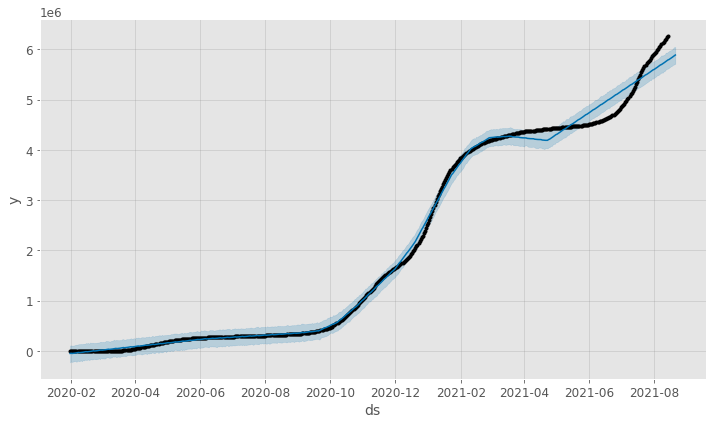

In [62]:
from prophet import Prophet

# Input dataframe
X_train_p = pd.DataFrame()
X_train_p['ds'] = df_ml.date
X_train_p['y'] = df_ml.total_cases

# Model training
model = Prophet()
model.fit(X_train_p)

# forecast
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
fig = model.plot(forecast)


### Time series for last month

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


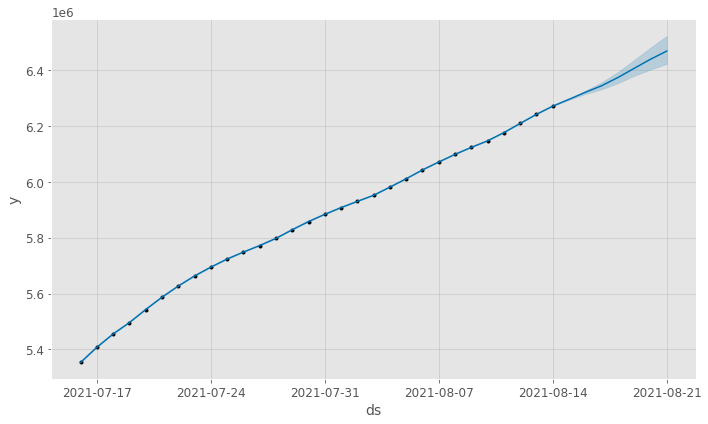

In [63]:
# Input dataframe
X_train_p_lm = pd.DataFrame()
X_train_p_lm['ds'] = df_ml.date.iloc[-30:]
X_train_p_lm['y'] = df_ml.total_cases.iloc[-30:]

# Model training
model_lm = Prophet()
model_lm.fit(X_train_p_lm)

# forecast
future_lm = model_lm.make_future_dataframe(periods=7)
forecast_lm = model_lm.predict(future_lm)
forecast_lm[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
fig_lm = model_lm.plot(forecast_lm)

As it is visible from the error calculation for the current case of United Kingdom, simple algorithms such as LR and PR seem to work much better in short term prediction of total_cases than more complex ones. The time series analysis using the prophet library also shows a good performance for short-term prediction as it is visible in the last graphic. 

Considering the above results, one can see the important role of the independet variable 'number of days from covid19 outbreak' (days_outbreak) and it ratifies the weight given in the curret literature.

In the next lines, I make a linear regression for the total_cases target, but now, using a set of independent variables where the 'days_outbreak' is also included. It is with the purpose to corroborate its importance.

## Multilineal Regression (MLR)

In [64]:
# Target : 'total_cases'
# Independent variables: 'new_cases', 'new_deaths', 'icu_patients', 'hosp_patients',
#                       'stringency_index', 'people_vaccinated', 'people_fully_vaccinated' 
y_mlr = df_ml.total_cases
X_mlr = df_ml[['days_outbreak','new_cases', 'new_deaths', 'icu_patients', 'hosp_patients',
            'stringency_index', 'people_vaccinated', 'people_fully_vaccinated']]

# Splitting dataset
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr, test_size=0.20, random_state=42)

# Model training
from sklearn.linear_model import LinearRegression
lin_reg_mlr = LinearRegression()
lin_reg_mlr.fit(X_train_mlr, y_train_mlr)
total_cases_pred_MLR = lin_reg_mlr.predict(X_test_mlr)

# Splitting dataset
print('X_train.shape:',X_train_mlr.shape)
print('X_test.shape:',X_test_mlr.shape)
print('y_train.shape:',y_train_mlr.shape)
print('y_test.shape:',y_test_mlr.shape,'\n')

# Coefficients & Intercept
print('Coefficient:', lin_reg_mlr.coef_)
print('Intercept:', lin_reg_mlr.intercept_, '\n')

# Error calculation:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_mlr, total_cases_pred_MLR))
print('Root Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test_mlr, total_cases_pred_MLR)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test_mlr, total_cases_pred_MLR))
print('Score: %.2f' % lin_reg_mlr.score(X_test_mlr, y_test_mlr))



X_train.shape: (449, 8)
X_test.shape: (113, 8)
y_train.shape: (449,)
y_test.shape: (113,) 

Coefficient: [ 5.82980455e+03  4.22268200e+00  6.93419431e-01  1.27613460e+02
  4.05743801e+01 -1.44466417e+04  9.98565979e-02 -5.80218315e-02]
Intercept: 46094.71189929708 

Mean squared error: 68316777597.17
Root Mean squared error: 261374.78
Coefficient of determination: 0.98
Score: 0.98


Comparing the Coefficient of determination between LR and MLR, it is evident the improvement of the regression by using multiple set of variables. However, it also clear the major role of the feature days_outbreak considering its performance being the only one in LR. In the next lines I will show a complementary analysis of feature importance in the prediction model.

## Feature Importance with shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


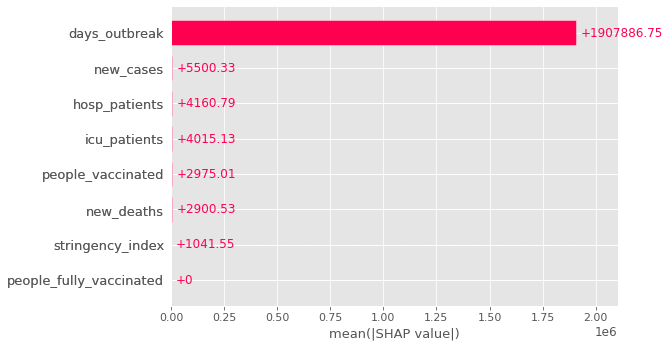

In [65]:
import xgboost
import shap

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X_mlr, y_mlr)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_mlr)

# visualize the first prediction's explanation
shap.plots.bar(shap_values)


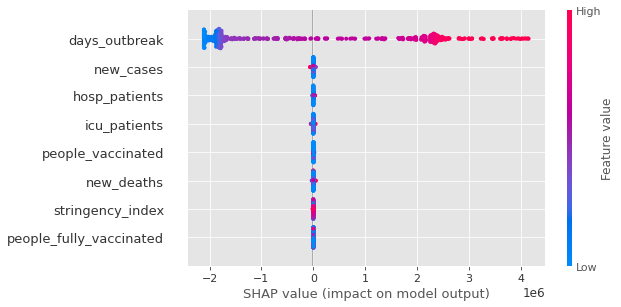

In [66]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

### Feature importance without days_outbreak

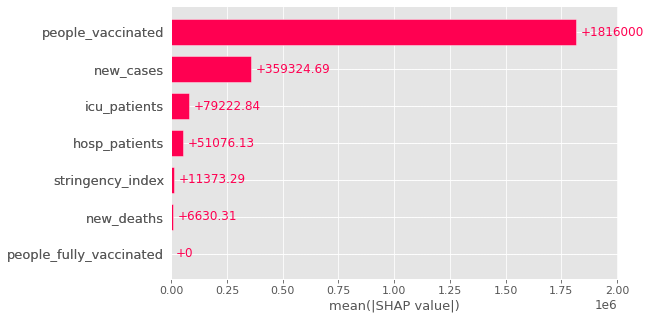

In [67]:
import xgboost
import shap

X_mlr_2 = X_mlr.drop(['days_outbreak'], axis=1)

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X_mlr_2, y_mlr)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_mlr_2)

# visualize the first prediction's explanation
shap.plots.bar(shap_values)

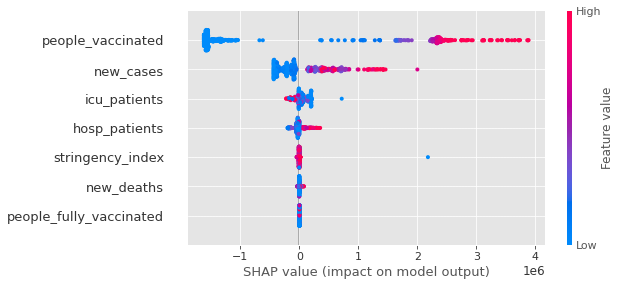

In [68]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

## Bibliography

[1] Short-Term Prediction of COVID-19 Cases Using Machine Learning Models,Md. Shahriare Satu et.al. Applied Science. 2021, 11, 4266. https://doi.org/10.3390/app11094266

[2] Tracking ℛ of COVID-19: A New Real-Time Estimation Using the Kalman Filter. Francisco Arroyo-Marioli et.al. MedRxiv. 2020. https://doi.org/10.1101/2020.04.19.20071886

[3] Prediction of new active cases of coronavirus disease (COVID-19)pandemic using multiple linear regression model. Smita Rath et. al. Diabetes & Metabolic Syndrome: Clinical Research & Reviews 14 (2020) 1467e1474. https://doi.org/10.1016/j.dsx.2020.07.045

[4] Predicting turning point, duration and attack rate of COVID-19 outbreaks in major Western countries. Xiaolei Zhang et. al. Chaos, Solitons and Fractals 135 (2020) 109829.
https://doi.org/10.1016/j.chaos.2020.109829

[5] A python based support vector regression model for prediction of COVID19 cases in India. Debanjan Parbat et. al. Chaos, Solitons and Fractals 138 (2020) 109942.
https://doi.org/10.1016/j.chaos.2020.109942

[6] Covid‑19 mortality is negatively associated with test number and government
effectiveness. Li‑Lin Liang et. al. Scientific Reporst (2020) 10:12567.
https://doi.org/10.1038/s41598-020-68862-x

